In [1]:
import module_update

Updated file nbtext.py
Updated file nbpictures.py


In [2]:
import nbpictures as nbp

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ntnu = nbp.find_urls('NTNU')
#ntnu

In [5]:
nbp.get_metadata_from_url(ntnu[0])

{'': '<a href="https://www.nb.no/items/97e34c1326ab2e825c08142c9a846268?manifest=https://api.nb.no/catalog/v1/iiif/97e34c1326ab2e825c08142c9a846268/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a>',
 'Andre opplysninger': 'NTH, NTNU, universitet\nPåskrift eske : Trondheim\nPåskrift negativ : Trondheim.Norges tekniske høiskole.061. Enerett  Mittet & Co.',
 'Dato': '21.12.1946',
 'Kilde for metadata': 'mavis.nb.no (/TitleWork/key/627817)',
 'Medietype': 'bilder',
 'Sted': 'Norge, Sør Trøndelag, Trondheim, Gløshaugen,Trondheim, Høgskoleringen 1',
 'Tilgang': 'Tilgang for alle',
 'Tittel': 'Trondheim. Norges tekniske høiskole.',
 'Utgiver': 'Mittet & Co. AS',
 'Varig lenke': '<a href="https://urn.nb.no/URN:NBN:no-nb_digifoto_20170117_00077_NB_MIT_GNR_09698" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digifoto_20170117_00077_NB_MIT_GNR_09698</a>'}

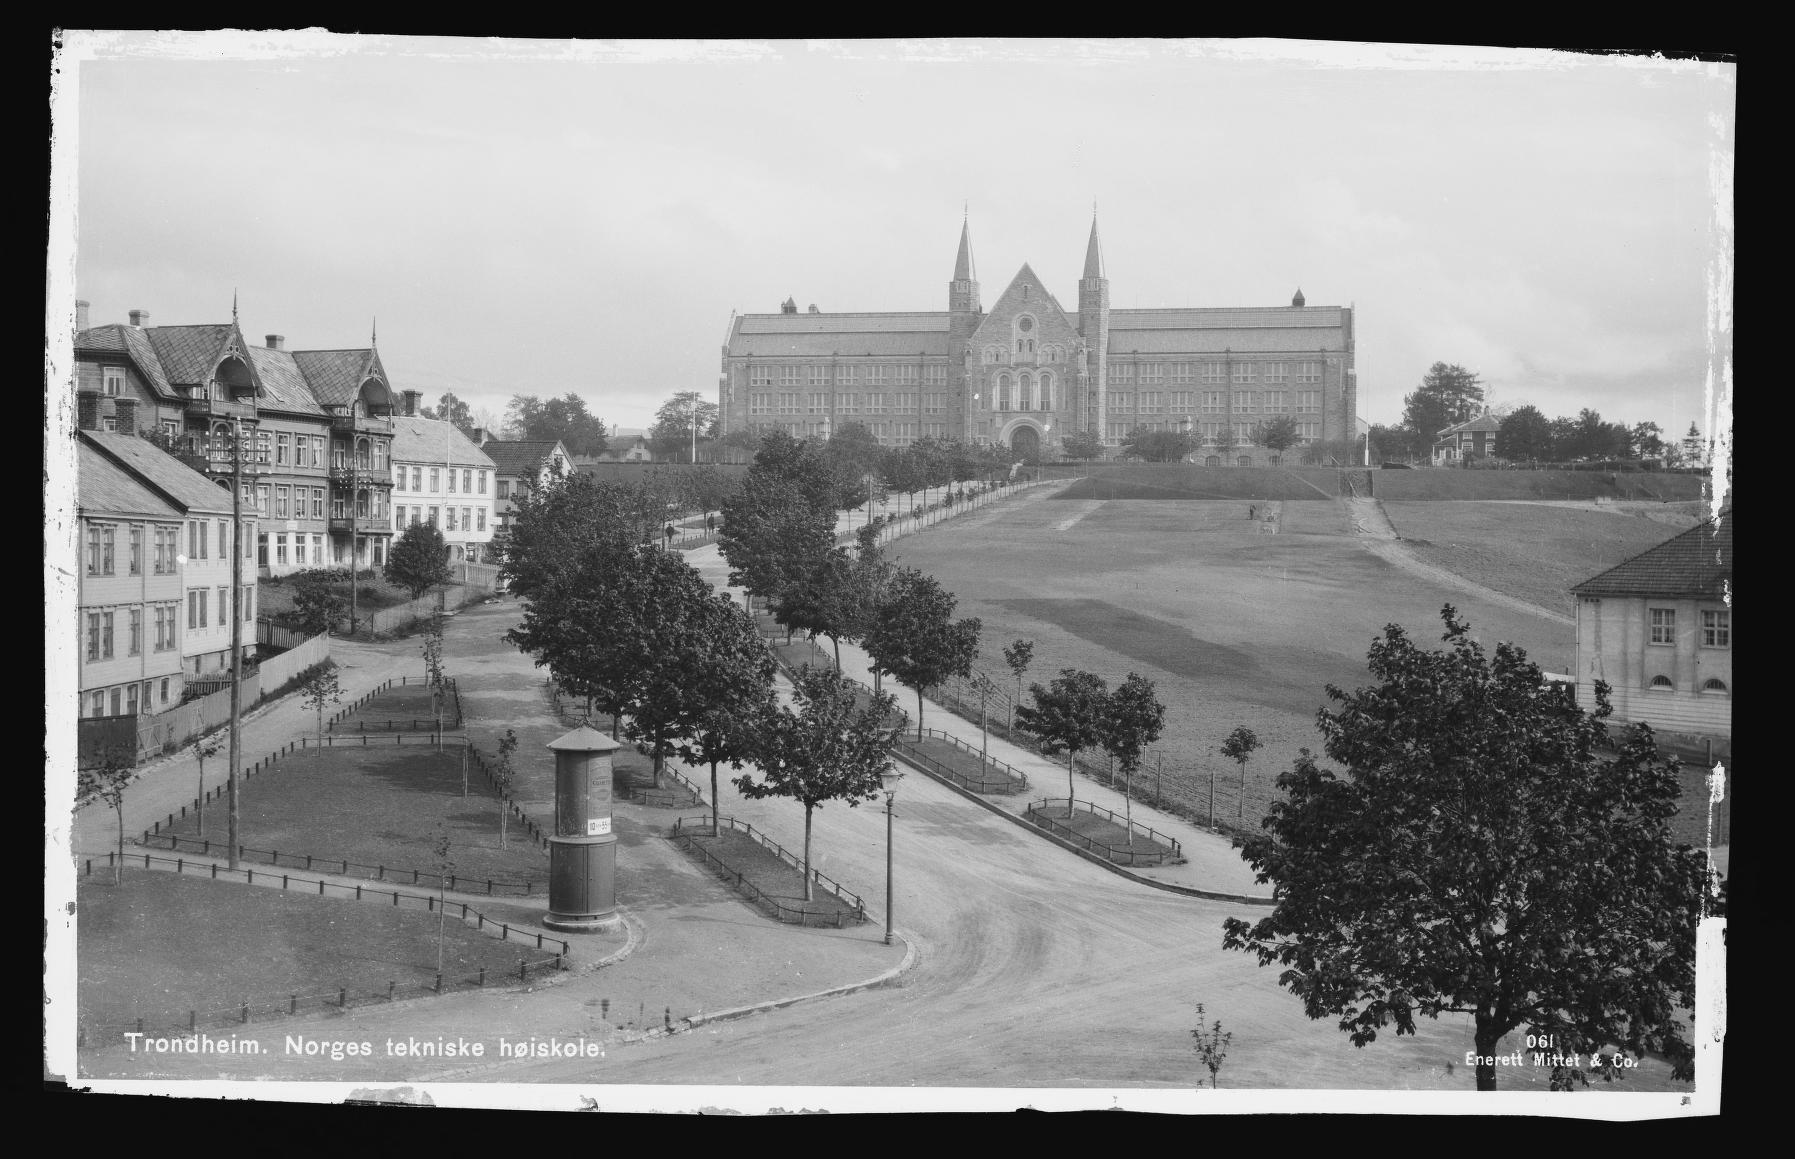

In [67]:
img = nbp.get_picture_from_url(ntnu[0], height=1000)
img

In [71]:
npimg = np.array(img)

In [75]:
npimg.shape

(1159, 1795)

In [83]:
npimg[200:]=0

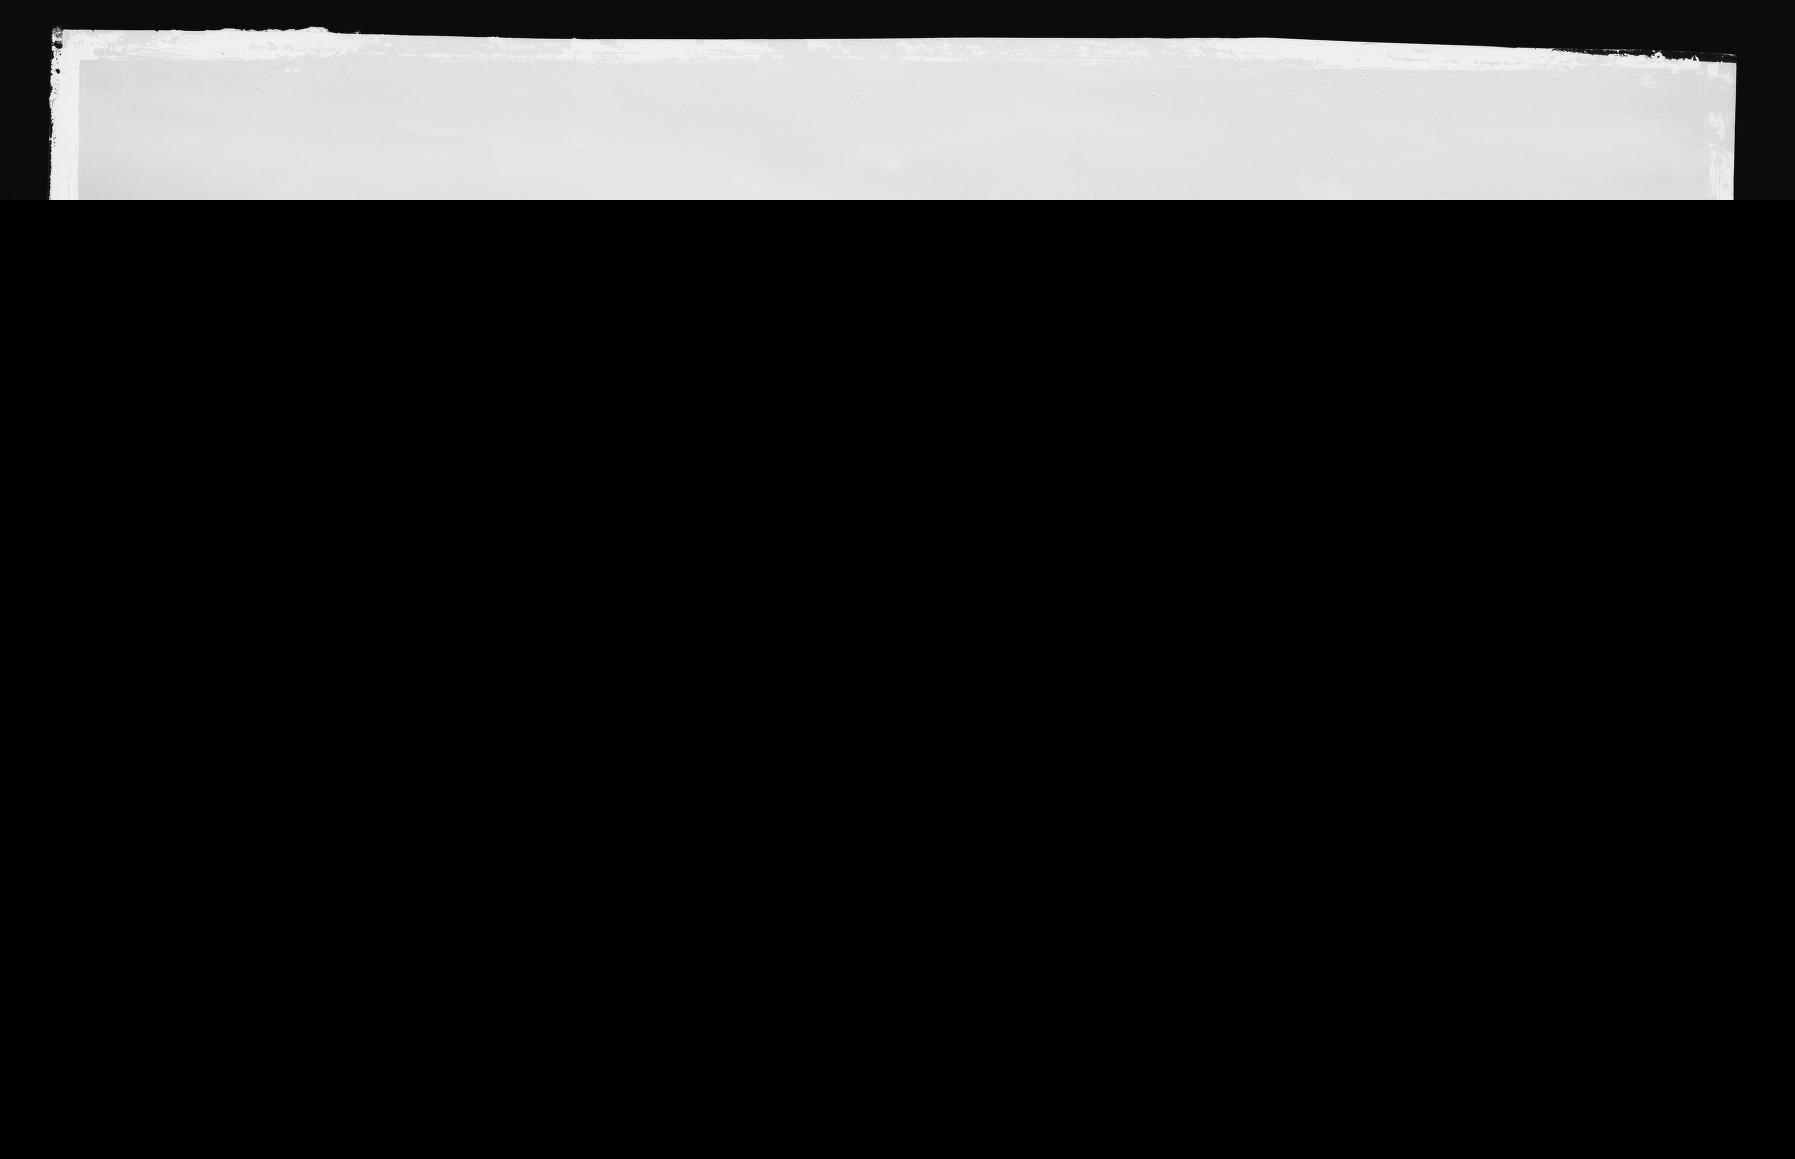

In [84]:
Image.fromarray(npimg)

In [7]:
from PIL import Image
import cv2
import numpy as np


In [51]:
def features_harris(img, param= 0.01):
    #ilename = 'chessboard.jpg'
    #img = cv2.imread(filename)

    #gray = cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)
    cvimg = np.array(img)
    gray = np.float32(cvimg)

    dst = cv2.cornerHarris(gray,2,3,0.04)

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)

    # Threshold for an optimal value, it may vary depending on the image.
    cvimg[dst>param*dst.max()]=[255]
    return Image.fromarray(cvimg)


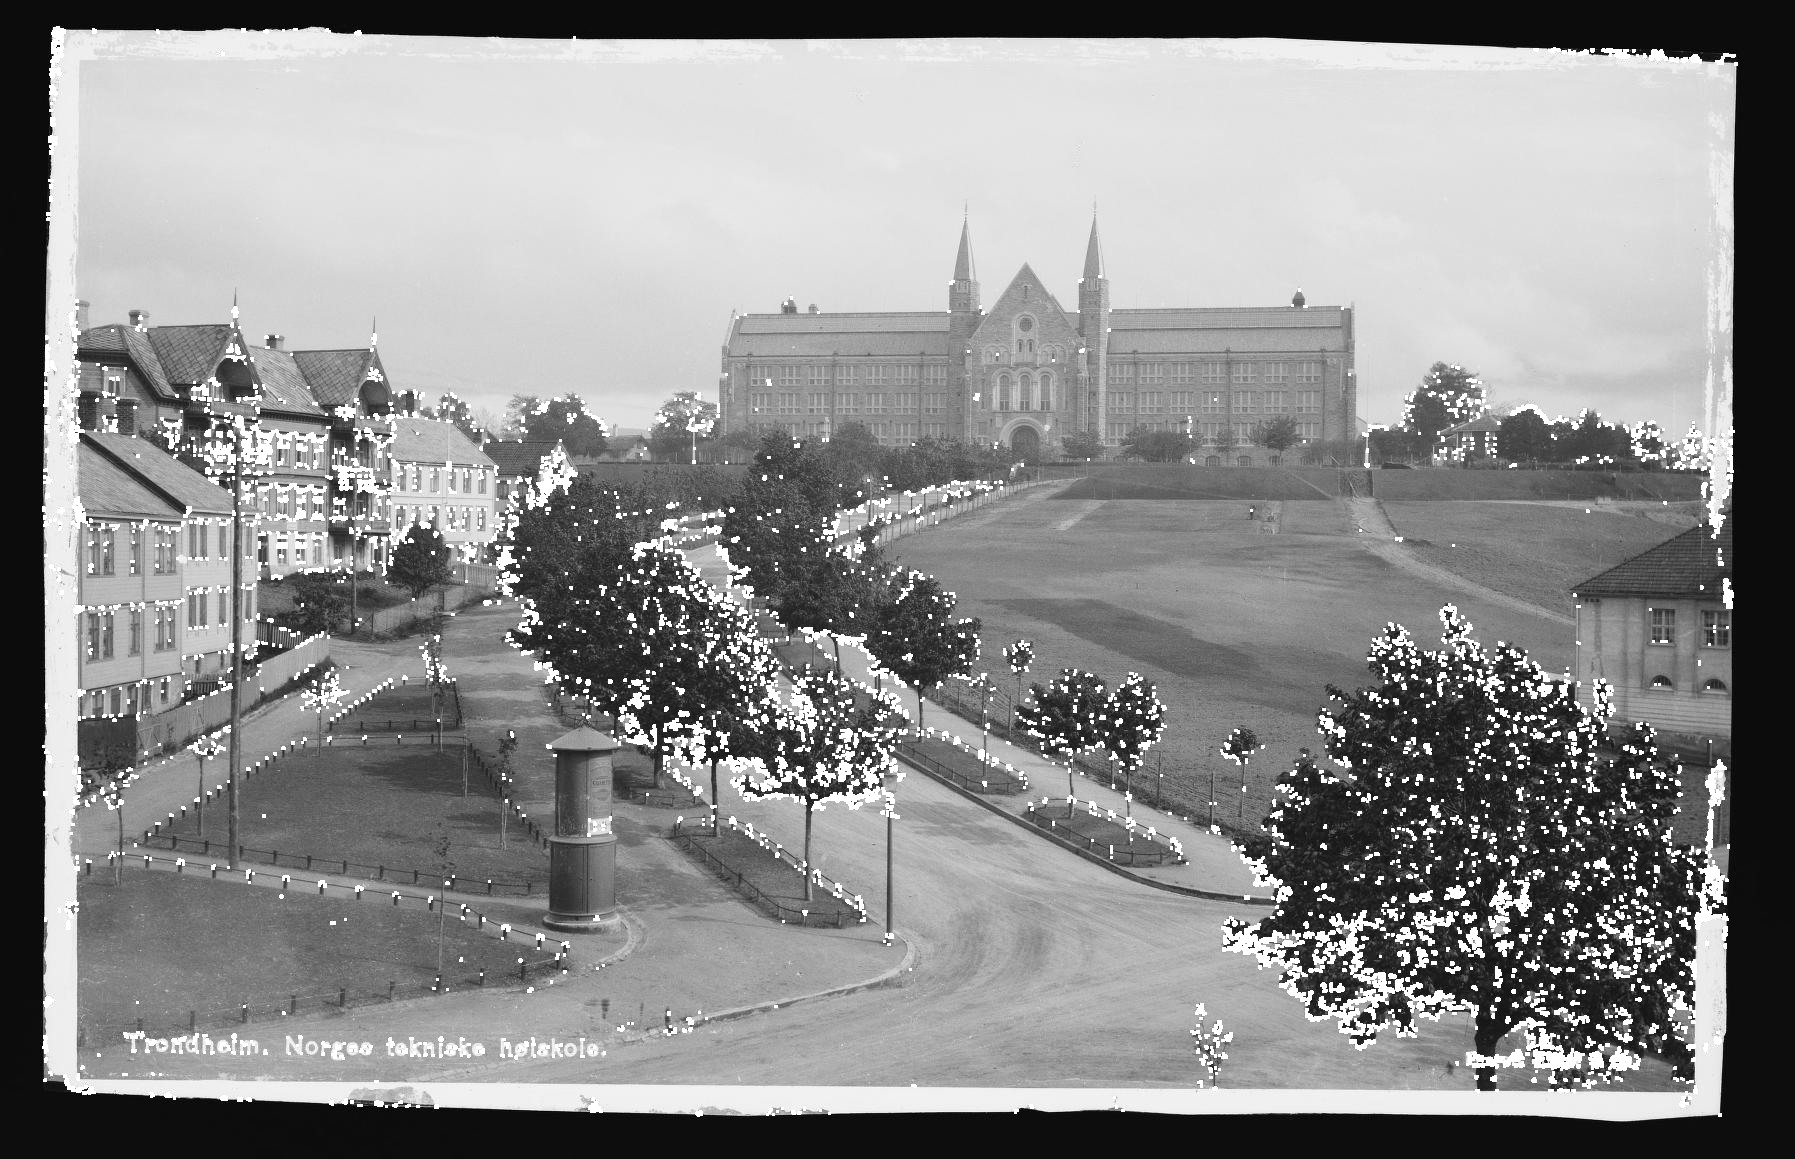

In [53]:
features_harris(img, param=0.005)

D:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


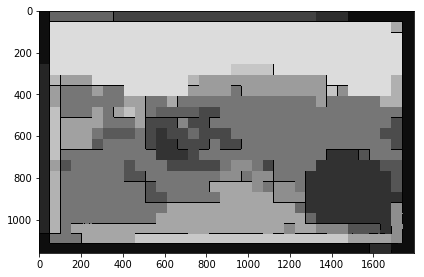

In [70]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.node[dst]['mean color'] - graph.node[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.node[dst]['total color'] += graph.node[src]['total color']
    graph.node[dst]['pixel count'] += graph.node[src]['pixel count']
    graph.node[dst]['mean color'] = (graph.node[dst]['total color'] /
                                     graph.node[dst]['pixel count'])


img = np.array(img)
labels = segmentation.slic(img, compactness=10, n_segments=800)
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, img, kind='avg')
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()

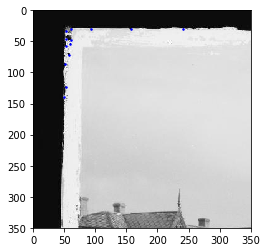

In [64]:
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = np.array(img) #warp(np.array(img), tform.inverse, output_shape=(350, 350))
rr, cc = ellipse(310, 175, 10, 100)
#image[rr, cc] = 1
#image[180:230, 10:60] = 1
#image[230:280, 60:110] = 1

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 350, 350, 0))
plt.show()
plt.tight_layout()


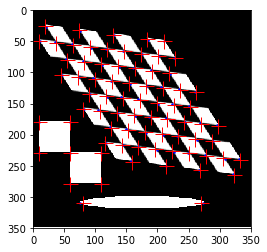

In [59]:
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))
rr, cc = ellipse(310, 175, 10, 100)
image[rr, cc] = 1
image[180:230, 10:60] = 1
image[230:280, 60:110] = 1

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 350, 350, 0))
plt.show()


In [13]:
nbp.display_finds(wilse)

"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_WB_03967/full/0,200/0/native.jpg'","TilgangTilgang for alle TittelWilse, Anders Beer Dato01.07.1912 Andre opplysningerProt: Kapt Wilse Bryllup Kirke FotografWilse, Anders Beer ProdusentWilse, Anders Beer TilvirkerWilse, Anders Beer Omtalt/AvbildetWilse Emnekirke | interiør | vielse Kilde for metadatagalnor.nb.no (22629) OmfangNegativ s/h glass 16 x 21 Medietypebilder EierNorsk Folkemuseum Varig lenkehttps://urn.nb.no/URN:NBN:no-nb_foto_NF_WB_03967"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_34476/full/0,200/0/native.jpg'","TilgangTilgang for alle TittelWilse, Anders Beer Dato01.08.1929 til 01.03.1929 Andre opplysningerProt: Vinter og Blandede - Sundland, frk. Wilse FotografWilse, Anders Beer ProdusentWilse, Anders Beer TilvirkerWilse, Anders Beer Omtalt/AvbildetWilse, frk Emnevilla Kilde for metadatagalnor.nb.no (157760) OmfangNegativ s/h plast 16 x 21 Medietypebilder EierNorsk Folkemuseum Varig lenkehttps://urn.nb.no/URN:NBN:no-nb_foto_NF_W_34476"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_34475/full/0,200/0/native.jpg'","TilgangTilgang for alle TittelWilse, Anders Beer Dato01.08.1929 til 01.03.1929 Andre opplysningerProt: Vinter og Blandede - Sundland, frk. Wilse FotografWilse, Anders Beer ProdusentWilse, Anders Beer TilvirkerWilse, Anders Beer Omtalt/AvbildetWilse, frk Emnevilla Kilde for metadatagalnor.nb.no (157758) OmfangNegativ s/h plast 16 x 21 Medietypebilder EierNorsk Folkemuseum Varig lenkehttps://urn.nb.no/URN:NBN:no-nb_foto_NF_W_34475"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_02159/full/0,200/0/native.jpg'","TilgangTilgang for alle TittelWilse, Anders Beer Dato01.07.1903 Andre opplysningerProt: Genere - Ved Lampen Wilse 25. Nov. 1903 FotografWilse, Anders Beer ProdusentWilse, Anders Beer TilvirkerWilse, Anders Beer Omtalt/AvbildetWilse Emnemann | portrett | lampe | lesing Kilde for metadatagalnor.nb.no (59515) OmfangNegativ s/h glass 21 x 16 Medietypebilder EierNorsk Folkemuseum Varig lenkehttps://urn.nb.no/URN:NBN:no-nb_foto_NF_W_02159"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_WB_03968/full/0,200/0/native.jpg'","TilgangTilgang for alle TittelWilse, Anders Beer Dato01.07.1912 Andre opplysningerProt: Kapt Wilse Bryllup Kirke FotografWilse, Anders Beer ProdusentWilse, Anders Beer TilvirkerWilse, Anders Beer Omtalt/AvbildetWilse Emnebrudepar | brudekjole | brudebukett | uniform | sabel | portrett Kilde for metadatagalnor.nb.no (42156) OmfangNegativ s/h glass 21 x 16 Medietypebilder EierNorsk Folkemuseum Varig lenkehttps://urn.nb.no/URN:NBN:no-nb_foto_NF_WB_03968"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_WB_03765/full/0,200/0/native.jpg'","TilgangTilgang for alle TittelWilse, Anders Beer Andre opplysningerKonv: Wilse, fru Omtalt/AvbildetWilse, fru Emnefotografi: portrett | kvinne Kilde for metadatagalnor.nb.no (158286) OmfangNegativ s/h plast 12 x 16 Medietypebilder EierNorsk Folkemuseum Varig lenkehttps://urn.nb.no/URN:NBN:no-nb_foto_NF_WB_03765"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_WF_15198/full/0,200/0/native.jpg'","TilgangTilgang for alle TittelWilse, Anders Beer Dato01.07.1941 Andre opplysningerProt: Wilse fru Helen FotografWilse, Anders Beer ProdusentWilse, Anders Beer TilvirkerWilse, Anders Beer Omtalt/AvbildetWilse, Helen Marie | Wilse, Robert Charles Emnekvinne | seng | mann | portrett Kilde for metadatagalnor.nb.no (30880) OmfangNegativ s/h plast 2.4 x 3.6 Medietypebilder EierNorsk Folkemuseum Varig lenkehttps://urn.nb.no/URN:NBN:no-nb_foto_NF_WF_15198"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_WF_15197/full/0,200/0/native.jpg'","TilgangTilgang for alle TittelWilse, Anders Beer Dato01.07.1941 Andre opplysningerProt: Wilse fru Helen FotografWilse, Anders Beer ProdusentWilse, Anders Beer TilvirkerW